In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Loading Functions

In [2]:
def loadNLP(folder, name):
    file = 'nlp/scenario_4/%s/%s.npy' % (folder, name)
    return np.load(file)

In [3]:
def loadData(folder):
    X_train = loadNLP(folder, 'train')
    y_train = loadNLP('labels', 'train')
    
    X_test = loadNLP(folder, 'test')
    y_test = loadNLP('labels', 'test')
    
    train = [X_train, y_train]
    test = [X_test, y_test]
    
    return train, test

# Load Data

In [4]:
train_uni, test_uni = loadData('unigram')

In [4]:
train_tfu, test_tfu = loadData('unigram_tfidf')

In [4]:
train_big, test_big = loadData('bigram')

In [4]:
train_tfb, test_tfb = loadData('bigram_tfidf')

In [4]:
train_runi, test_runi = loadData('reduced_unigram')

In [5]:
train_rtfu, test_rtfu = loadData('reduced_unigram_tfidf')

In [6]:
train_rbig, test_rbig = loadData('reduced_bigram')

In [7]:
train_rtfb, test_rtfb = loadData('reduced_bigram_tfidf')

# Define Machine Learning Classifier Functions

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [11]:
def genClassifiers():

    classifiers = [LogisticRegression(), RandomForestClassifier()]
    names = ['Logistic Regression', 'Random Forest']
    
    return classifiers, names

In [12]:
def evalClassifiers(train, test):
    
    clf_array, clf_names = genClassifiers()
    
    X_train = train[0]
    y_train = train[1]
    
    X_test = test[0]
    y_test = test[1]
    
    for i in range(0, len(clf_array)):
        start = time.time()
        clf_array[i].fit(X_train, y_train)
        end = time.time() - start
        
        y_pred = clf_array[i].predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        f_score = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        print(clf_names[i] + ': Completed in ' + str(end) + ' seconds')
        print(clf_names[i] + ' Accuracy: ' + str(accuracy))
        print(clf_names[i] + ' ROC AUC Score: ' + str(roc_auc))
        print(clf_names[i] + ' F Score: ' + str(f_score))
        print(clf_names[i] + ' Precision: ' + str(precision))
        print(clf_names[i] + ' Recall: ' + str(recall))
        print(" ")

# Evaluate Classifiers

## Unigram Classifiers

In [23]:
evalClassifiers(train_uni, test_uni)

Logistic Regression: Completed in 9.660091876983643 seconds
Logistic Regression Accuracy: 0.7958690568978956
Logistic Regression ROC AUC Score: 0.8021123088055524
Logistic Regression F Score: 0.8161976279037125
Logistic Regression Precision: 0.717016029593095
Logistic Regression Recall: 0.9472226747027203
 
Random Forest: Completed in 34.014397859573364 seconds
Random Forest Accuracy: 0.6970381917381138
Random Forest ROC AUC Score: 0.7075328617900909
Random Forest F Score: 0.7503372085554627
Random Forest Precision: 0.619406150583245
Random Forest Recall: 0.9514578921648477
 


## Unigram-Tfidf Classifiers

In [24]:
evalClassifiers(train_tfu, test_tfu)

Logistic Regression: Completed in 3.13169002532959 seconds
Logistic Regression Accuracy: 0.5964146531566641
Logistic Regression ROC AUC Score: 0.612081312883817
Logistic Regression F Score: 0.6983220694476812
Logistic Regression Precision: 0.5435827664399093
Logistic Regression Recall: 0.9762176250203616
 
Random Forest: Completed in 40.08765697479248 seconds
Random Forest Accuracy: 0.6342166796570538
Random Forest ROC AUC Score: 0.6467786008337852
Random Forest F Score: 0.7106480054257353
Random Forest Precision: 0.5717261904761904
Random Forest Recall: 0.9387522397784656
 


## Bigram Classifiers

In [10]:
evalClassifiers(train_big, test_big)

Logistic Regression: Completed in 63.54027771949768 seconds
Logistic Regression Accuracy: 0.4967264224473889
Logistic Regression ROC AUC Score: 0.5173114751129058
Logistic Regression F Score: 0.6543916929829257
Logistic Regression Precision: 0.48732461734693877
Logistic Regression Recall: 0.9957647825378726
 
Random Forest: Completed in 1985.6068527698517 seconds
Random Forest Accuracy: 0.5044427123928293
Random Forest ROC AUC Score: 0.5241719328945197
Random Forest F Score: 0.6549066435084672
Random Forest Precision: 0.49108669108669106
Random Forest Recall: 0.9827333441928653
 


## Bigram-Tfidf Classifiers

In [9]:
evalClassifiers(train_tfb, test_tfb)

Logistic Regression: Completed in 32.14740991592407 seconds
Logistic Regression Accuracy: 0.4959469992205768
Logistic Regression ROC AUC Score: 0.5165843603896763
Logistic Regression F Score: 0.6541526284828065
Logistic Regression Precision: 0.48694267515923567
Logistic Regression Recall: 0.9962534614758104
 
Random Forest: Completed in 1984.1316301822662 seconds
Random Forest Accuracy: 0.502883865939205
Random Forest ROC AUC Score: 0.5227580189126758
Random Forest F Score: 0.6546458739441197
Random Forest Precision: 0.49030740530456646
Random Forest Recall: 0.9846880599446164
 


## Reduced Unigram Classifiers

In [13]:
evalClassifiers(train_runi, test_runi)

Logistic Regression: Completed in 3.0869739055633545 seconds
Logistic Regression Accuracy: 0.5210444271239283
Logistic Regression ROC AUC Score: 0.5336786773236151
Logistic Regression F Score: 0.6230755075752928
Logistic Regression Precision: 0.4997048406139315
Logistic Regression Recall: 0.8273334419286529
 
Random Forest: Completed in 8.196435928344727 seconds
Random Forest Accuracy: 0.5351519875292283
Random Forest ROC AUC Score: 0.552075760743201
Random Forest F Score: 0.660596403368996
Random Forest Precision: 0.5076532843523135
Random Forest Recall: 0.9454308519302818
 


## Reduced Unigram-Tfidf Classifiers

In [14]:
evalClassifiers(train_rtfu, test_rtfu)

Logistic Regression: Completed in 2.279865026473999 seconds
Logistic Regression Accuracy: 0.4763834762275916
Logistic Regression ROC AUC Score: 0.493178104836714
Logistic Regression F Score: 0.617556643515883
Logistic Regression Precision: 0.4746652664741402
Logistic Regression Recall: 0.883531519791497
 
Random Forest: Completed in 6.539378881454468 seconds
Random Forest Accuracy: 0.5226812159002339
Random Forest ROC AUC Score: 0.5412885499284511
Random Forest F Score: 0.661283185840708
Random Forest Precision: 0.5006280880998242
Random Forest Recall: 0.9737742303306728
 


## Reduced Bigram Classifiers

In [15]:
evalClassifiers(train_rbig, test_rbig)

Logistic Regression: Completed in 15.870713710784912 seconds
Logistic Regression Accuracy: 0.45962587685113016
Logistic Regression ROC AUC Score: 0.4787243656272783
Logistic Regression F Score: 0.620338426154099
Logistic Regression Precision: 0.4672496287741297
Logistic Regression Recall: 0.9226258348265189
 
Random Forest: Completed in 23.84049391746521 seconds
Random Forest Accuracy: 0.5082618862042089
Random Forest ROC AUC Score: 0.5261403184128055
Random Forest F Score: 0.6469699513177773
Random Forest Precision: 0.49275485850664846
Random Forest Recall: 0.9416843134060922
 


## Reduced Bigram-Tfidf Classifiers

In [16]:
evalClassifiers(train_rtfb, test_rtfb)

Logistic Regression: Completed in 9.332559823989868 seconds
Logistic Regression Accuracy: 0.4813717848791894
Logistic Regression ROC AUC Score: 0.501864529375744
Logistic Regression F Score: 0.6434847835405059
Logistic Regression Precision: 0.47944111776447107
Logistic Regression Recall: 0.9781723407721127
 
Random Forest: Completed in 28.824246883392334 seconds
Random Forest Accuracy: 0.491348402182385
Random Forest ROC AUC Score: 0.509790121245595
Random Forest F Score: 0.6384086879432624
Random Forest Precision: 0.4837517843647661
Random Forest Recall: 0.9384264538198404
 


# Define Neural Network Functions

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
def DNN(train, test, iterations = 50, early_stop = False, info = 0):
    X_train = train[0]
    y_train = train[1]
    
    X_test = test[0]
    y_test = test[1]
    
    dim = len(X_train[0])
    
    model = models.Sequential()
    if dim >= 40000:
        model.add(layers.Dense(500, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(128, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(32, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu'))
    elif dim >= 9000:
        model.add(layers.Dense(200, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(64, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu'))        
    elif dim >= 1000:
        model.add(layers.Dense(100, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(16, kernel_regularizer = l2(.001),
                               activation = 'relu'))
    else:
        model.add(layers.Dense(16, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim, )))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.summary()
    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    start = time.time()
    
    callback = [EarlyStopping(monitor = 'val_loss', min_delta = .0001)]
    if early_stop:
        history = model.fit(X_train, y_train,
                            epochs = iterations,
                            verbose = info,
                            batch_size = 128,
                            callbacks = callback,
                            validation_data = (X_test, y_test))
    else:
        history = model.fit(X_train, y_train,
                            epochs = iterations,
                            verbose = info,
                            batch_size = 128,
                            validation_data = (X_test, y_test))
        
    end = time.time() - start
    
    test_vals = model.evaluate(X_test, y_test)
    
    print("Training Time:  ", end)
    print("Model Loss:     ", test_vals[0])
    print("Model Accuracy: ", test_vals[1])
    
    return model, history

In [9]:
def plotFigures(hist, epoch_range):
    
    training_loss = hist.history['loss']
    training_acc = hist.history['accuracy']
    
    validation_loss = hist.history['val_loss']
    validation_acc = hist.history['val_accuracy']
    
    epochs = range(1, epoch_range + 1)
    
    f = plt.figure(1)
    plt.title("Training and Validation Loss")
    plt.plot(epochs, training_loss, 'r', label = 'Training Loss')
    plt.plot(epochs, validation_loss, 'b', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    g = plt.figure(2)
    plt.title("Training and Validation Accuracy")
    plt.plot(epochs, training_acc, 'r', label = 'Training Acc')
    plt.plot(epochs, validation_acc, 'b', label = 'Validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

In [10]:
def evaluate(model, history, test, name):
    X_test = test[0]
    y_test = test[1]
    epoch_range = len(history.history['loss'])
    
    pred_sigmoid = model.predict(X_test)
    pred = []
    for p in pred_sigmoid:
        if p < .5:
            pred.append(0)
        else:
            pred.append(1)
    y_pred = np.asarray(pred)
    
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(name + ' Evaluation: ')
    print('Accuracy:       ', acc)
    print('ROC AUC Score:  ', roc_auc)
    print('F1 Score:       ', f)
    print('Precision:      ', precision)
    print('Recall:         ', recall)
    
    plotFigures(history, epoch_range)

# Training Neural Networks

In [9]:
dnn_uni, hist_uni = DNN(train_uni, test_uni)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2800200   
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 2,813,329
Trainable params: 2,813,329
Non-trainable params: 0
______________________________________________

In [11]:
dnn_tfu, hist_tfu = DNN(train_tfu, test_tfu)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2800200   
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 2,813,329
Trainable params: 2,813,329
Non-trainable params: 0
______________________________________________

In [10]:
dnn_big, hist_big = DNN(train_big, test_big)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               43000500  
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1

In [11]:
dnn_tfb, hist_tfb = DNN(train_tfb, test_tfb)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               43000500  
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1

In [13]:
dnn_runi, hist_runi = DNN(train_runi, test_runi)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                11216     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 11,289
Trainable params: 11,289
Non-trainable params: 0
_________________________________________________________________
12830/12830 [==============================] - 0s 27us/sample - loss: 2.3359 - accuracy: 0.5101
Training Time:   32.49987006187439
Model Loss:      2.3359235473749513
Model Accuracy:  0.5101325


In [14]:
dnn_rtfu, hist_rtfu = DNN(train_rtfu, test_rtfu)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                11216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 11,289
Trainable params: 11,289
Non-trainable params: 0
_________________________________________________________________
12830/12830 [==============================] - 0s 35us/sample - loss: 2.9314 - accuracy: 0.4940
Training Time:   28.04306411743164
Model Loss:      2.9314055515562103
Model Accuracy:  0.49399844


In [15]:
dnn_rbig, hist_rbig = DNN(train_rbig, test_rbig)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               430100    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 431,733
Trainable params: 431,733
Non-trainable params: 0
_________________________________________________________________
12830/12830 [==============================] - 1s 100us/sample - loss: 2.0284 - accuracy: 0.4680
Training Time:   111.6181252002716
Model Loss:      2.0284304480578688
Model Accuracy:  0.4679657


In [16]:
dnn_rtfb, hist_rtfb = DNN(train_rtfb, test_rtfb)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               430100    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 431,733
Trainable params: 431,733
Non-trainable params: 0
_________________________________________________________________
12830/12830 [==============================] - 1s 97us/sample - loss: 2.2906 - accuracy: 0.4920
Training Time:   109.332190990448
Model Loss:      2.2906445757448903
Model Accuracy:  0.49197194


# Evaluate Neural Networks

DNN Unigram Evaluation: 
Accuracy:        0.7744349181605612
ROC AUC Score:   0.7818445245305847
F1 Score:        0.8018893756845564
Precision:       0.6915810603377022
Recall:          0.9540641798338492


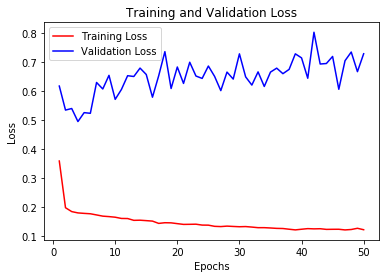

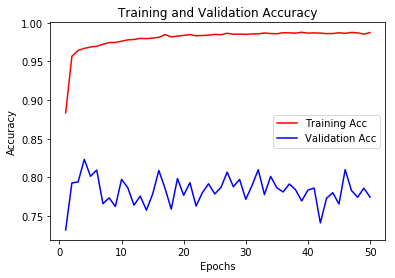

In [12]:
evaluate(dnn_uni, hist_uni, test_uni, 'DNN Unigram')

DNN Unigram-Tfidf Evaluation: 
Accuracy:        0.6781761496492595
ROC AUC Score:   0.6899259346973707
F1 Score:        0.741177208048643
Precision:       0.602404727939678
Recall:          0.9630232936960417


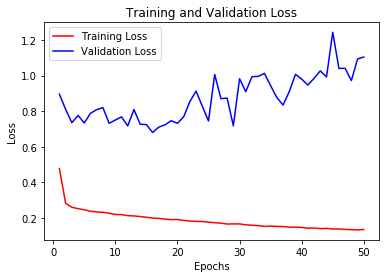

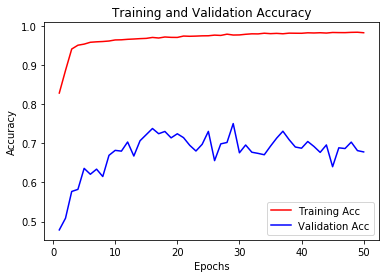

In [12]:
evaluate(dnn_tfu, hist_tfu, test_tfu, 'DNN Unigram-Tfidf')

DNN Bigram Evaluation: 
Accuracy:        0.540452065471551
ROC AUC Score:   0.557352071519829
F1 Score:        0.664275139505751
Precision:       0.5106364352621903
Recall:          0.950154748330347


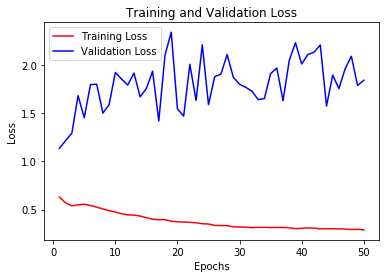

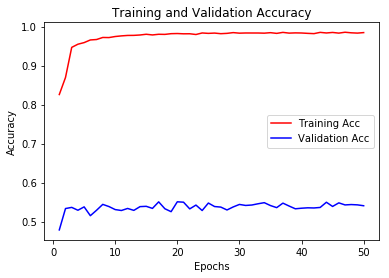

In [11]:
evaluate(dnn_big, hist_big, test_big, 'DNN Bigram')

DNN Bigram-Tfidf Evaluation: 
Accuracy:        0.5341387373343726
ROC AUC Score:   0.5519710890402336
F1 Score:        0.6650226979767977
Precision:       0.5069207108680793
Recall:          0.9664440462616061


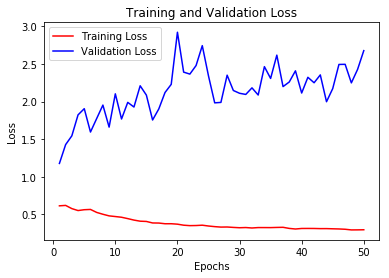

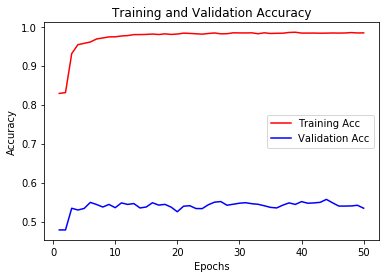

In [12]:
evaluate(dnn_tfb, hist_tfb, test_tfb, 'DNN Bigram-Tfidf')

DNN Reduced Unigram Evaluation: 
Accuracy:        0.5101325019485581
ROC AUC Score:   0.5236132983481444
F1 Score:        0.620493931525874
Precision:       0.492995586259835
Recall:          0.8369441277080958


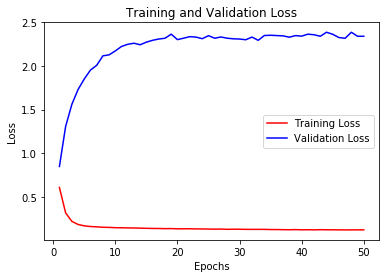

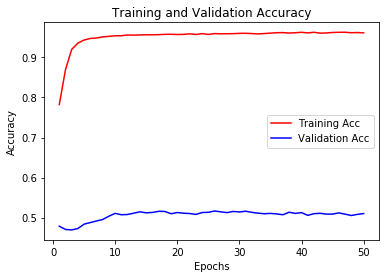

In [17]:
evaluate(dnn_runi, hist_runi, test_runi, 'DNN Reduced Unigram')

DNN Reduced Unigram-Tfidf Evaluation: 
Accuracy:        0.49399844115354635
ROC AUC Score:   0.5089846640313433
F1 Score:        0.6185215654013397
Precision:       0.48377608236051106
Recall:          0.8573057501221697


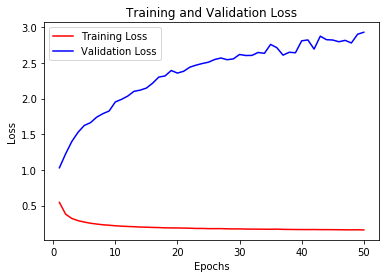

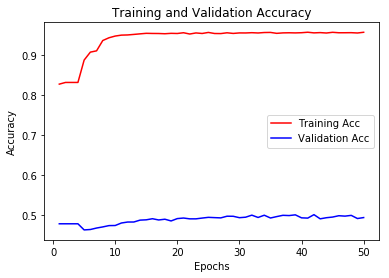

In [18]:
evaluate(dnn_rtfu, hist_rtfu, test_rtfu, 'DNN Reduced Unigram-Tfidf')

DNN Reduced Bigram Evaluation: 
Accuracy:        0.4679657053780203
ROC AUC Score:   0.48395185233126975
F1 Score:        0.6061165608770918
Precision:       0.46930569207398803
Recall:          0.8555139273497312


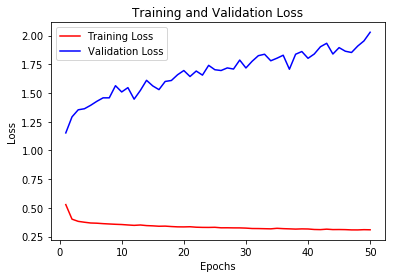

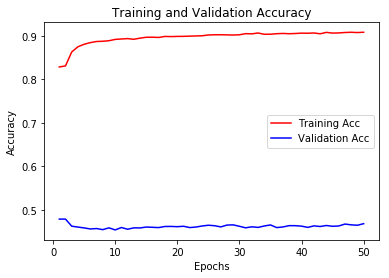

In [19]:
evaluate(dnn_rbig, hist_rbig, test_rbig, 'DNN Reduced Bigram')

DNN Reduced Bigram-Tfidf Evaluation: 
Accuracy:        0.49197194076383477
ROC AUC Score:   0.5074852257577159
F1 Score:        0.6205170004657663
Precision:       0.4828304792969104
Recall:          0.8680566867568008


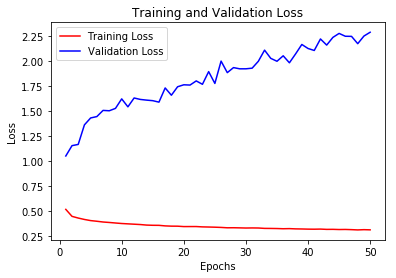

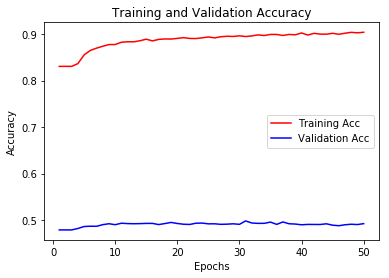

In [20]:
evaluate(dnn_rtfb, hist_rtfb, test_rtfb, 'DNN Reduced Bigram-Tfidf')

# Training Neural Networks - Early Stopping

In [13]:
dnn_uni_s, hist_uni_s = DNN(train_uni, test_uni, early_stop = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               2800200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 2,813,329
Trainable params: 2,813,329
Non-trainable params: 0
____________________________________________

In [13]:
dnn_tfu_s, hist_tfu_s = DNN(train_tfu, test_tfu, early_stop = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               2800200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 2,813,329
Trainable params: 2,813,329
Non-trainable params: 0
____________________________________________

In [12]:
dnn_big_s, hist_big_s = DNN(train_big, test_big, early_stop = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               43000500  
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                

In [13]:
dnn_tfb_s, hist_tfb_s = DNN(train_tfb, test_tfb, early_stop = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               43000500  
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                

In [21]:
dnn_runi_s, hist_runi_s = DNN(train_runi, test_runi, early_stop = True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                11216     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 11,289
Trainable params: 11,289
Non-trainable params: 0
_________________________________________________________________
12830/12830 [==============================] - 0s 30us/sample - loss: 1.3883 - accuracy: 0.4659
Training Time:   2.041698932647705
Model Loss:      1.3883153101381434
Model Accuracy:  0.46586126


In [22]:
dnn_rtfu_s, hist_rtfu_s = DNN(train_rtfu, test_rtfu, early_stop = True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                11216     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 11,289
Trainable params: 11,289
Non-trainable params: 0
_________________________________________________________________
12830/12830 [==============================] - 0s 31us/sample - loss: 1.3076 - accuracy: 0.4785
Training Time:   2.140225648880005
Model Loss:      1.30762340686141
Model Accuracy:  0.4784879


In [23]:
dnn_rbig_s, hist_rbig_s = DNN(train_rbig, test_rbig, early_stop = True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               430100    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 431,733
Trainable params: 431,733
Non-trainable params: 0
_________________________________________________________________
12830/12830 [==============================] - 1s 95us/sample - loss: 1.2438 - accuracy: 0.4785
Training Time:   5.794493913650513
Model Loss:      1.2438043035015127
Model Accuracy:  0.4784879


In [24]:
dnn_rtfb_s, hist_rtfb_s = DNN(train_rtfb, test_rtfb, early_stop = True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               430100    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 431,733
Trainable params: 431,733
Non-trainable params: 0
_________________________________________________________________
12830/12830 [==============================] - 1s 99us/sample - loss: 1.0790 - accuracy: 0.4785
Training Time:   5.765434741973877
Model Loss:      1.0789675102323084
Model Accuracy:  0.4784879


# Evaluate Neural Networks - Early Stopping

DNN Early Stop Unigram Evaluation: 
Accuracy:        0.7219017926734217
ROC AUC Score:   0.7315119572478843
F1 Score:        0.7666753858226524
Precision:       0.6404457554900033
Recall:          0.9548786447304122


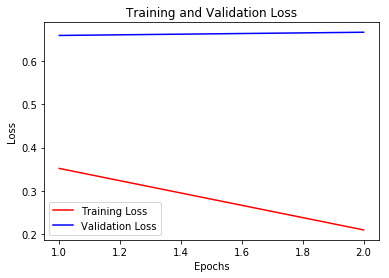

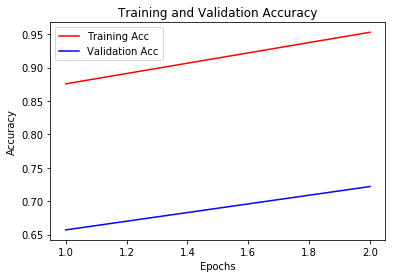

In [14]:
evaluate(dnn_uni_s, hist_uni_s, test_uni, 'DNN Early Stop Unigram')

DNN Early Stop Unigram-Tfidf Evaluation: 
Accuracy:        0.609742790335152
ROC AUC Score:   0.6246513753063251
F1 Score:        0.7042702734628786
Precision:       0.5524462564862861
Recall:          0.9711679426616713


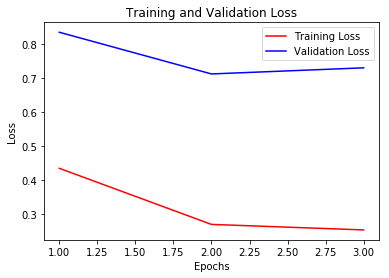

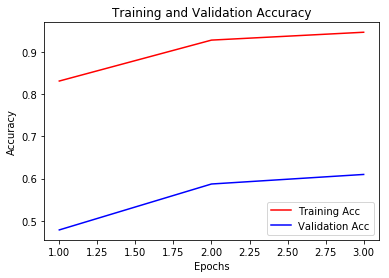

In [14]:
evaluate(dnn_tfu_s, hist_tfu_s, test_tfu, 'DNN Early Stop Unigram-Tfidf')

DNN Early Stop Bigram Evaluation: 
Accuracy:        0.5042868277474669
ROC AUC Score:   0.5242710904352071
F1 Score:        0.6562162162162162
Precision:       0.49106059380309036
Recall:          0.9887603844274312


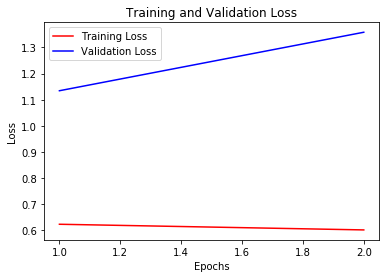

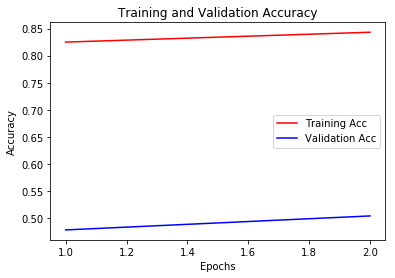

In [13]:
evaluate(dnn_big_s, hist_big_s, test_big, 'DNN Early Stop Bigram')

DNN Early Stop Bigram-Tfidf Evaluation: 
Accuracy:        0.47848791893998444
ROC AUC Score:   0.5
F1 Score:        0.6472665928620381
Precision:       0.47848791893998444
Recall:          1.0


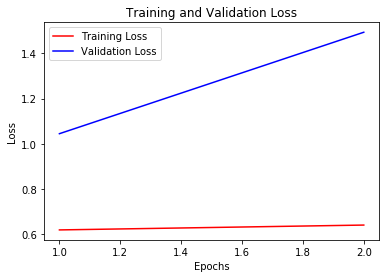

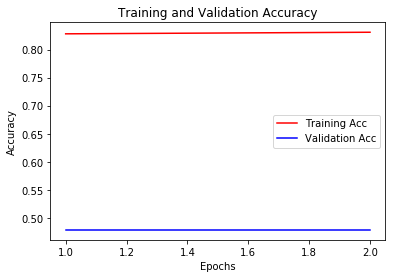

In [14]:
evaluate(dnn_tfb_s, hist_tfb_s, test_tfb, 'DNN Early Stop Bigram-Tfidf')

DNN Early Stop Reduced Unigram Evaluation: 
Accuracy:        0.46586126266562744
ROC AUC Score:   0.4846353528305509
F1 Score:        0.6226529376135675
Precision:       0.47030444185659626
Recall:          0.920996905033393


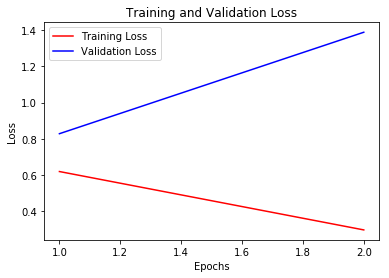

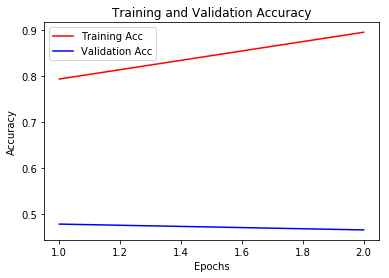

In [25]:
evaluate(dnn_runi_s, hist_runi_s, test_runi, 'DNN Early Stop Reduced Unigram')

DNN Early Stop Reduced Unigram-Tfidf Evaluation: 
Accuracy:        0.47848791893998444
ROC AUC Score:   0.5
F1 Score:        0.6472665928620381
Precision:       0.47848791893998444
Recall:          1.0


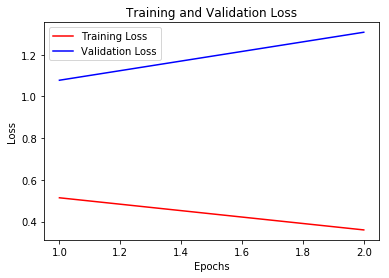

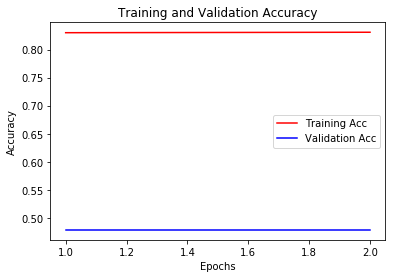

In [26]:
evaluate(dnn_rtfu_s, hist_rtfu_s, test_rtfu, 'DNN Early Stop Reduced Unigram-Tfidf')

DNN Early Stop Reduced Bigram Evaluation: 
Accuracy:        0.47848791893998444
ROC AUC Score:   0.5
F1 Score:        0.6472665928620381
Precision:       0.47848791893998444
Recall:          1.0


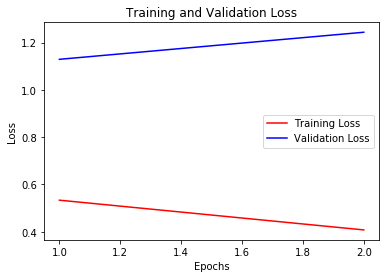

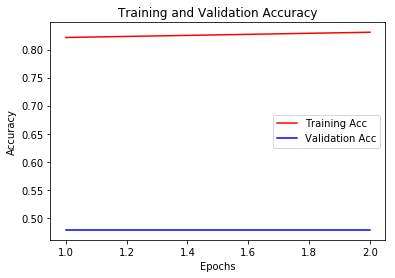

In [27]:
evaluate(dnn_rbig_s, hist_rbig_s, test_rbig, 'DNN Early Stop Reduced Bigram')

DNN Early Stop Reduced Bigram-Tfidf Evaluation: 
Accuracy:        0.47848791893998444
ROC AUC Score:   0.5
F1 Score:        0.6472665928620381
Precision:       0.47848791893998444
Recall:          1.0


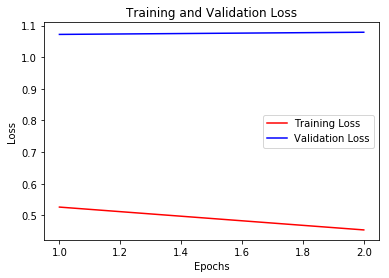

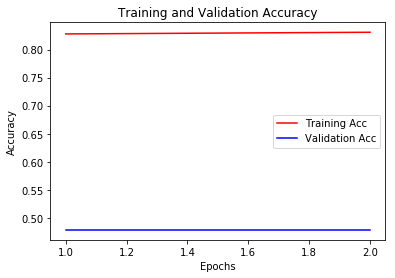

In [28]:
evaluate(dnn_rtfb_s, hist_rtfb_s, test_rtfb, 'DNN Early Stop Reduced Bigram-Tfidf')